<a href="https://colab.research.google.com/github/BrnCode/Previsao_Alugueis_Bicicletas_Series_Temporais/blob/main/EDA_locacoes_de_bicicleta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados: Locação de Bicicletas
## Introdução
Este notebook apresenta uma análise exploratória dos dados de locação de bicicletas, focando em entender padrões, tendências e sazonalidades nos dados. O objetivo é preparar os dados para a modelagem de séries temporais utilizando o Prophet.

# Projeto de Previsão de Aluguéis de Bicicletas com Séries Temporais

---
## Objetivos do Projeto:
  - **Análise Exploratória de Dados (EDA):** Entender a estrutura, as características, sazonalidades e as tendências presentes nos dados.
  - **Análise Preditiva:** Desenvolveremos um modelo preditivo para antecipar eventos ou comportamentos futuros. Neste projeto, utilizaremos o Prophet para esse propósito.

---

## Dataset: Aluguel de Bicicletas em Londres

**Link:** https://github.com/BrnCode/Previsao_Alugueis_Bicicletas_Series_Temporais/blob/main/bicicletas.csv

**Resumo:**
- **Contexto:** Para este projeto, utilizaremos um conjunto de dados fornecido pela Alura no curso de séries temporais. Este conjunto de dados contém informações coletadas ao longo de 2 anos sobre uma empresa de aluguel de bicicletas que atua em Londres. Saber onde isso ocorre é um fator importante, pois o conjunto de dados inclui informações sobre o clima. Portanto, é necessário considerar informações sobre como as estações do ano ocorrem no hemisfério norte.
---

## 1 - Análise Exploratória de Dados (EDA):

In [174]:
import pandas as pd
import numpy as np

### Pre tratamento

In [175]:
df = pd.read_csv("https://raw.githubusercontent.com/BrnCode/Previsao_Alugueis_Bicicletas_Series_Temporais/main/bicicletas.csv")
df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,NaN,NaN,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [176]:
df.shape

(17429, 10)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17429 entries, 0 to 17428
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17429 non-null  object 
 1   contagem          17429 non-null  int64  
 2   temperatura       17406 non-null  float64
 3   sensacao_termica  17406 non-null  float64
 4   umidade           17429 non-null  float64
 5   velocidade_vento  17429 non-null  float64
 6   clima             17429 non-null  object 
 7   feriado           17429 non-null  object 
 8   fim_de_semana     17429 non-null  object 
 9   estacao           17429 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [178]:
df.columns

Index(['data_hora', 'contagem', 'temperatura', 'sensacao_termica', 'umidade',
       'velocidade_vento', 'clima', 'feriado', 'fim_de_semana', 'estacao'],
      dtype='object')

In [179]:
df.isnull().sum()

data_hora            0
contagem             0
temperatura         23
sensacao_termica    23
umidade              0
velocidade_vento     0
clima                0
feriado              0
fim_de_semana        0
estacao              0
dtype: int64

In [180]:
df["temperatura"] = df["temperatura"].interpolate()
df["sensacao_termica"] = df["sensacao_termica"].interpolate()

In [181]:
df.duplicated().sum()

15

In [182]:
df = df.drop_duplicates()
df.shape

(17414, 10)

In [183]:
df = df.sort_values(by='data_hora')
df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno


## Analise descritiva

### Olhando para as variaveis numericas

In [184]:
df.describe()

,contagem,temperatura,sensacao_termica,umidade,velocidade_vento
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468206,11.521080,72.324954,15.913063
std,1085.108068,5.571670,6.614799,14.313186,7.894570
min,0.000000,-1.500000,-6.000000,20.500000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000
max,7860.000000,34.000000,34.000000,100.000000,56.500000


* Contagem:

A alta variação (desvio padrão: 1085.11) e a grande diferença entre os valores mínimo (0) e máximo (7860) sugerem uma diversidade nos dados de contagem, possivelmente refletindo diferentes condições climaticas ou preferencias em dias da semana.

* Temperatura e Sensação Térmica:

As médias (12.47°C e 11.52°C, respectivamente) são próximas, o que é esperado, mas a sensação térmica geralmente é um pouco menor.
A variação nas temperaturas (desvio padrão: 5.57°C para temperatura e 6.61°C para sensação térmica) é significativa, com temperaturas mínimas abaixo de zero (-1.5°C) e máximas chegando a 34.0°C, o vai nos mostrar se existe alguma preferencia ou restrição para baixas ou altas temperaturas.
Os quartis mostram uma distribuição razoavelmente simétrica ao redor da mediana, com temperaturas de 8.0°C a 16.0°C cobrindo a maioria dos dados (entre Q1 e Q3).

* Umidade:

A média de umidade é alta (72.32%), e a variação (desvio padrão: 14.31%) mostra que a umidade varia bastante.
O intervalo interquartil (63.0% a 83.0%) indica que a maioria das medições de umidade está dentro desse intervalo.

* Velocidade do Vento:

A velocidade média do vento é 15.91 km/h, com uma variação significativa (desvio padrão: 7.89 km/h).
As velocidades do vento variam de 0 km/h (calma) a um máximo de 56.5 km/h (ventos muito fortes).
A maioria dos valores está entre 10.0 km/h e 20.5 km/h, como mostrado pelos quartis.

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt


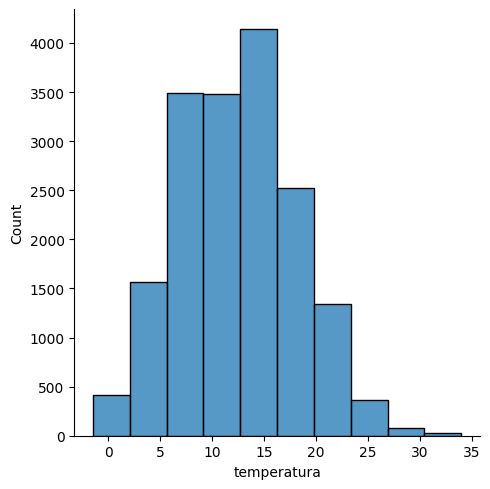

In [186]:
sns.displot(df, x="temperatura", bins=10)

plt.show()

Temos uma distribuição normal ou quase normal com uma leve inclinação para a direita, mostrando que a maior parte dos alugueis é feita quando se tem 15 graus de temperatura.

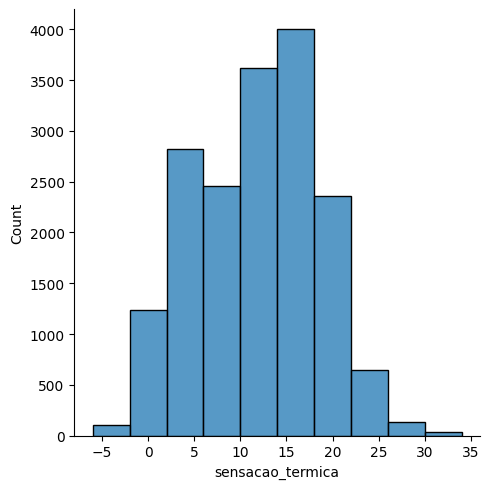

In [187]:
sns.displot(df, x="sensacao_termica", bins=10)

plt.show()

A distribuição da sensação termica segue um padrão similar ao da temperatura, porem, com uma assimetria para esquerda, especialmente porque inclui vamores a baixo de 0.

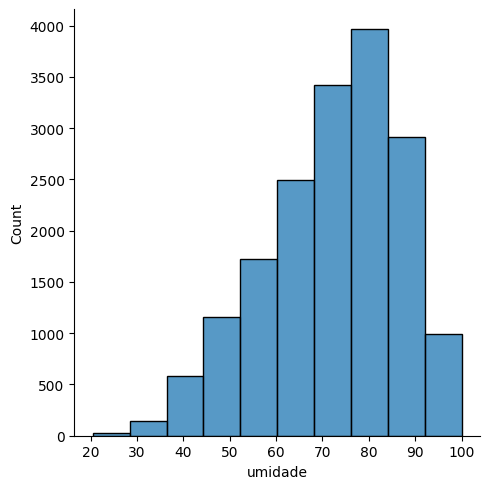

In [188]:
sns.displot(df, x="umidade", bins=10)

plt.show()

Já para a umidade, temos um gráfico bastante assimétrico para a esquerda, mas que não tem seu pico no máximo dos valores apresentados, o que seria um pico de aluguéis quando chove. No entanto, a umidade "preferida" para pedalar é em torno de 80%, o que torna o clima agradável.

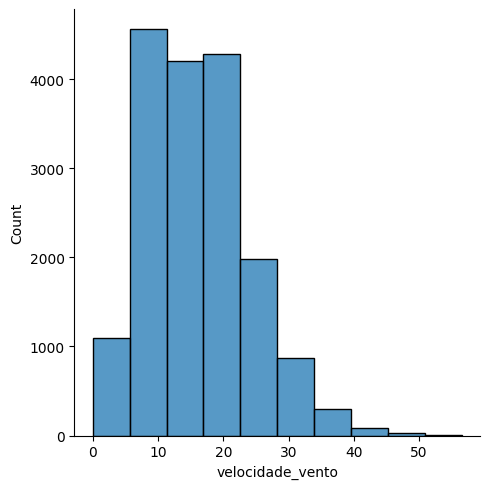

In [189]:
sns.displot(df, x="velocidade_vento", bins=10)

plt.show()

E na velocidade do vento temos um grafico oposto ao de cima, tendo ventos mais amenos como o favorito para pedalar.

In [190]:
df_c = df[['contagem', 'temperatura', 'sensacao_termica', 'umidade',
       'velocidade_vento']]

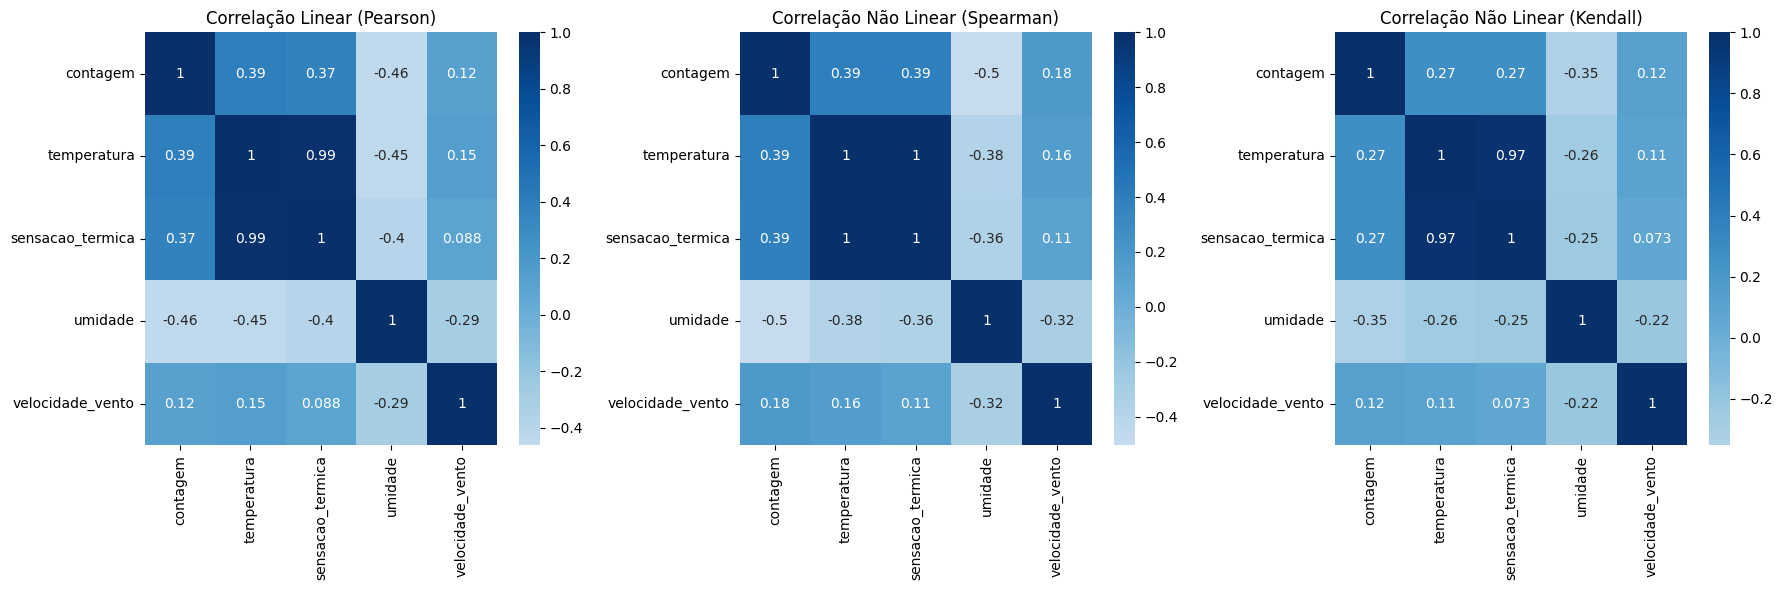

In [191]:
# Correlações lineares (Pearson)
corr_pearson = df_c.corr(method='pearson')

# Correlações não lineares (Spearman)
corr_spearman = df_c.corr(method='spearman')

# Correlações não lineares (Kendall)
corr_kendall = df_c.corr(method='kendall')

# Plotando os heatmaps
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.heatmap(corr_pearson, annot=True, cmap='Blues', center=0)
plt.title('Correlação Linear (Pearson)')

plt.subplot(1, 3, 2)
sns.heatmap(corr_spearman, annot=True, cmap='Blues', center=0)
plt.title('Correlação Não Linear (Spearman)')

plt.subplot(1, 3, 3)
sns.heatmap(corr_kendall, annot=True, cmap='Blues', center=0)
plt.title('Correlação Não Linear (Kendall)')

plt.tight_layout()
plt.show()


Ao analisar três tipos de correlações, podemos entender como as variáveis presentes em nosso conjunto de dados se relacionam com nossa variável alvo, a **contagem**. Na correlação de Pearson, que é linear, observamos que a temperatura e a sensação térmica têm uma boa relação com a contagem, e que elas têm uma correlação quase perfeita entre si. Observamos um comportamento similar nas correlações de Spearman e Kendall, que são correlações não lineares e não paramétricas.

### Olhando para as variaveis categoricas

In [192]:
df.describe(include=[object])

,data_hora,clima,feriado,fim_de_semana,estacao
count,17414,17414,17414,17414,17414
unique,17414,6,2,2,4
top,2015-01-04 00:00:00,Céu limpo,Não,Não,Primavera
freq,1,6150,17030,12444,4394


In [193]:
for i in df[['clima', 'feriado', 'fim_de_semana', 'estacao']]:
    print(f'Coluna: {i}')
    print(df[i].unique())
    print(' ')

Coluna: clima
['Nublado' 'Céu limpo' 'Parcialmente nublado' 'Chuva leve' 'Neve'
 'Chuva com trovoadas']
 
Coluna: feriado
['Não' 'Sim']
 
Coluna: fim_de_semana
['Sim' 'Não']
 
Coluna: estacao
['Inverno' 'Primavera' 'Verão' 'Outono']
 


Tentando entender a influencia de feriados e finais de semana na demanda da locação de bicicleta

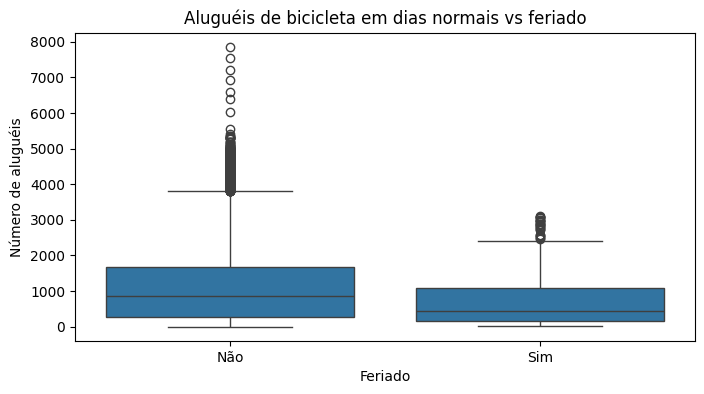

In [194]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='feriado', y='contagem', data=df)
plt.title('Aluguéis de bicicleta em dias normais vs feriado')
plt.xlabel('Feriado')
plt.ylabel('Número de aluguéis')
plt.show()

Quando é feriado temos uma mediana menor e menos outliers.

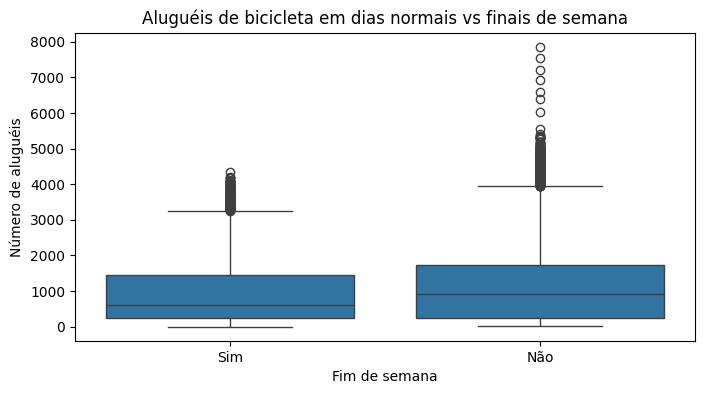

In [195]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='fim_de_semana', y='contagem', data=df)
plt.title('Aluguéis de bicicleta em dias normais vs finais de semana')
plt.xlabel('Fim de semana')
plt.ylabel('Número de aluguéis')
plt.show()

Resultado siminar aos feriados, vendo que dias de semana temos uma demanda maior.

In [196]:
mediana_feriado = df.groupby('feriado')['contagem'].median()
mediana_fds = df.groupby('fim_de_semana')['contagem'].median()

print('Mediana por feriado:')
print(mediana_feriado)
print('\n')
print('Mediana por fim de semana:')
print(mediana_fds)

Mediana por feriado:
feriado
Não    855.0
Sim    439.5
Name: contagem, dtype: float64


Mediana por fim de semana:
fim_de_semana
Não    927.0
Sim    619.0
Name: contagem, dtype: float64


Com isso, temos a certeza de que os dias de semana comuns são os que geram mais aluguéis de bike!

### Olhando para os fatores climaticos

In [197]:
df_clima = df.groupby('clima')['contagem'].sum().reset_index().sort_values(by='contagem', ascending=False)

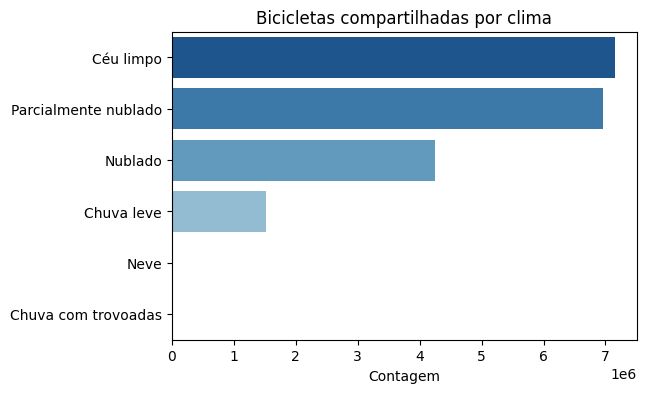

In [198]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df_clima, y='clima', x='contagem', hue='clima', palette='Blues_r', orient='h')
plt.title('Bicicletas compartilhadas por clima')
plt.xlabel('Contagem')
plt.ylabel('')
plt.show()

Ceu limpo e parcialmente nublado correspondem a maior parte dos alugueis

In [199]:
df.columns

Index(['data_hora', 'contagem', 'temperatura', 'sensacao_termica', 'umidade',
       'velocidade_vento', 'clima', 'feriado', 'fim_de_semana', 'estacao'],
      dtype='object')

In [200]:
df_estacao = df.groupby('estacao')['contagem'].sum().reset_index().sort_values(by='contagem', ascending=False)

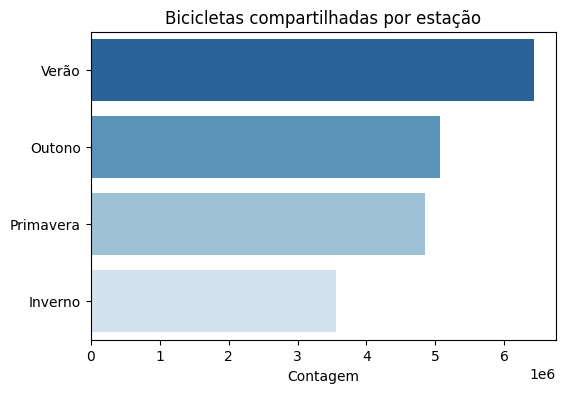

In [201]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df_estacao, y='estacao', x='contagem', hue='estacao', palette='Blues_r', orient='h')
plt.title('Bicicletas compartilhadas por estação')
plt.xlabel('Contagem')
plt.ylabel('')
plt.show()

Verão (de julho a agosto) é a estação com mais locações, provavelmente quando plotarmos o grafico de contagem por dia, veremos um pico no meio do ano.

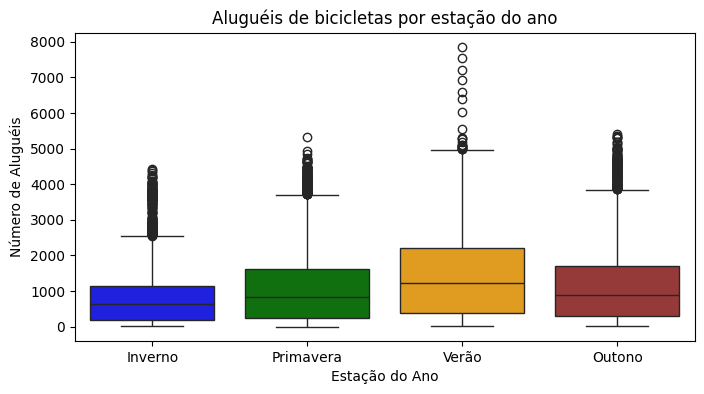

In [202]:
plt.figure(figsize=(8, 4))
paleta_cores = {'Primavera': 'green', 'Verão': 'orange', 'Outono': 'brown', 'Inverno': 'blue'}
sns.boxplot(x='estacao', y='contagem', data=df, hue='estacao', palette=paleta_cores)
plt.title('Aluguéis de bicicletas por estação do ano')
plt.xlabel('Estação do Ano')
plt.ylabel('Número de Aluguéis')
plt.show()


Primavera e outono tem comportamentos muito parecidos, vamos olhar a mediana:

In [203]:
df.groupby('estacao')['contagem'].median()

estacao
Inverno       632.0
Outono        898.0
Primavera     823.0
Verão        1214.0
Name: contagem, dtype: float64

Usando o teste (de Mann-Whitney) não parametrico de amostras independentes, para descobrir se as distribuições são iguais ou diferentes.

Nossa **hipotese nula** é que a distribuição das duas estações são iguais e a **hipotese alternativa** é que as estações são diferentes!

In [204]:
from scipy.stats import mannwhitneyu

In [205]:
primavera = df[df['estacao'] =='Primavera']['contagem']
outono = df[df['estacao'] =='Outono']['contagem']

u_statistic, p_value = mannwhitneyu(primavera, outono, alternative='two-sided')

u_statistic, p_value

(9044682.5, 0.0004762100221646296)

Quando o P-valor < 0.5, a gente descarta a hipotese nula e adota a hipotese alternativa, pois há uma diferença significativa entre as estações. Logo é necessario planos de ação diferente para cada uma das estações!

### Analisando os dados históricos olhando para os alugueis em diferentes horarios

In [206]:
df['data_hora'] = pd.to_datetime(df['data_hora'])
df.dtypes

data_hora           datetime64[ns]
contagem                     int64
temperatura                float64
sensacao_termica           float64
umidade                    float64
velocidade_vento           float64
clima                       object
feriado                     object
fim_de_semana               object
estacao                     object
dtype: object

In [207]:
df_time = df.copy()

In [208]:
df_time['mes'] = df_time['data_hora'].dt.month
df_time['dia_da_semana'] = df_time['data_hora'].dt.dayofweek
df_time['horario'] = df_time['data_hora'].dt.hour

In [209]:
df_time.columns

Index(['data_hora', 'contagem', 'temperatura', 'sensacao_termica', 'umidade',
       'velocidade_vento', 'clima', 'feriado', 'fim_de_semana', 'estacao',
       'mes', 'dia_da_semana', 'horario'],
      dtype='object')

In [210]:
df_time['data_hora'] = df_time['data_hora'].dt.date
df_time.head(1)

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,dia_da_semana,horario
0,2015-01-04,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno,1,6,0


In [211]:
df_time = df_time.rename(columns={'data_hora':'data'})
df_time.head(1)

,data,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,dia_da_semana,horario
0,2015-01-04,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno,1,6,0


In [212]:
df_time.dtypes

data                 object
contagem              int64
temperatura         float64
sensacao_termica    float64
umidade             float64
velocidade_vento    float64
clima                object
feriado              object
fim_de_semana        object
estacao              object
mes                   int32
dia_da_semana         int32
horario               int32
dtype: object

In [213]:
df_time['data'] = pd.to_datetime(df_time['data'])

In [214]:
df_por_hora = df_time.groupby('horario')['contagem'].sum().reset_index()
df_por_hora

,horario,contagem
0,0,210401
1,1,145257
2,2,98275
3,3,67951
4,4,52859
5,5,79820
6,6,338771
7,7,1066309
8,8,2087164
9,9,1201745


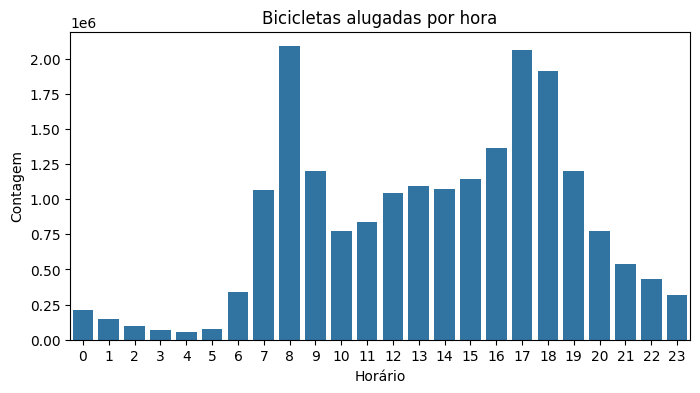

In [215]:
plt.figure(figsize=(8,4))
sns.barplot(data=df_por_hora, x='horario', y='contagem')
plt.title('Bicicletas alugadas por hora')
plt.xlabel('Horário')
plt.ylabel('Contagem')

plt.show()

Parece que as pessoas usam comumente para ir ao trabalho/escola pela manhã e voltar ao fim da tarde.

In [216]:
df_fds = df_time[df_time['fim_de_semana'] == 'Sim']

alugueis_fim_de_semana = df_fds.groupby('horario')['contagem'].sum().reset_index()

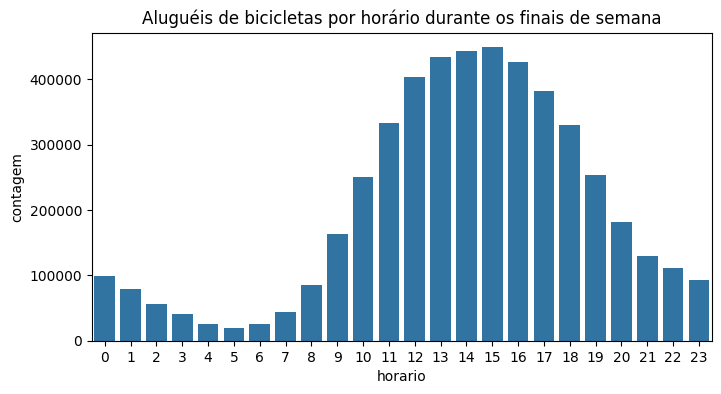

In [217]:
plt.figure(figsize=(8,4))
sns.barplot(x='horario', y='contagem', data=alugueis_fim_de_semana)
plt.title('Aluguéis de bicicletas por horário durante os finais de semana')

plt.show()

Aos finais de semana vemos uma dinamica diferente, com menos uso para ir e voltar de afazeres em horario comercial, mas com um pico as 15, onde provavelmente se vê pessoas pedalando em parques e avenidas fechadas.

In [218]:
df_feriado = df_time[df_time['feriado'] == 'Sim']

alugueis_feriado = df_feriado.groupby('horario')['contagem'].sum().reset_index()

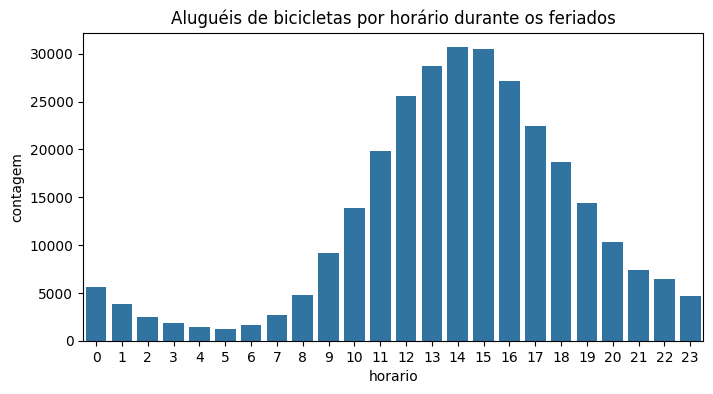

In [219]:
plt.figure(figsize=(8,4))
sns.barplot(x='horario', y='contagem', data=alugueis_feriado)
plt.title('Aluguéis de bicicletas por horário durante os feriados')

plt.show()

E vemos uma dinamica muito similar nos feriados, reforçando a hipotese citada anteriormente.

In [220]:
df_tempo = df_time.groupby('data')['contagem'].sum().reset_index()

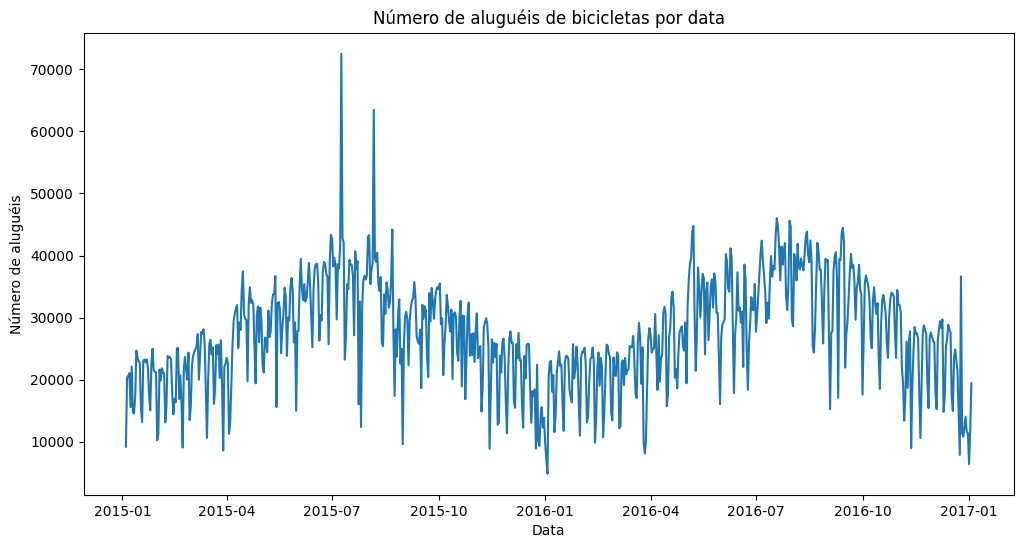

In [221]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_tempo, x='data', y='contagem')
plt.title('Número de aluguéis de bicicletas por data')
plt.xlabel('Data')
plt.ylabel('Número de aluguéis')

plt.show()

No começo do ano vemos uma baixa, se comparado ao meio do ano, parece que esse padrão se repete. E após uma curta pesquisa nos picos de 2015 (9 de julho e 6 de agosto), foi possivel entender que os picos se deram a greves metroviarias em Londres, cidade da qual estamos olhando os dados.

In [240]:
alugueis_dia_semana  = df_time.groupby('dia_da_semana')['contagem'].sum().reset_index()

In [241]:
# Mapeando os números dos dias para os nomes dos dias da semana
dias_semana = {0: 'Segunda-feira', 1: 'Terça-feira', 2: 'Quarta-feira', 3: 'Quinta-feira', 4: 'Sexta-feira', 5: 'Sábado', 6: 'Domingo'}
alugueis_dia_semana['dia_da_semana'] = alugueis_dia_semana['dia_da_semana'].map(dias_semana)

# Ordenar os dias da semana corretamente
ordem_dias_semana = ['Domingo', 'Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado']
alugueis_dia_semana['dia_da_semana'] = pd.Categorical(alugueis_dia_semana['dia_da_semana'], categories=ordem_dias_semana, ordered=True)


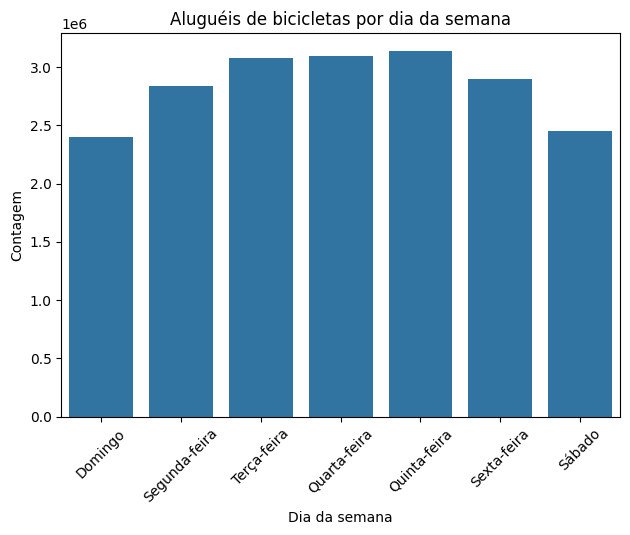

In [242]:
sns.barplot(data=alugueis_dia_semana, x='dia_da_semana', y='contagem')
plt.title('Aluguéis de bicicletas por dia da semana')
plt.xlabel('Dia da semana')
plt.ylabel('Contagem')

plt.tight_layout()
plt.xticks(rotation=45)
plt.show();

Vemos um comportamento interressante, reforçando que as bicicletas são usadas majoritariamente em dia da semana, provavelmente com finalidade de ir ao trabalho ou escola.

In [243]:
alugueis_mensais = df_time.groupby('mes')['contagem'].sum().reset_index()

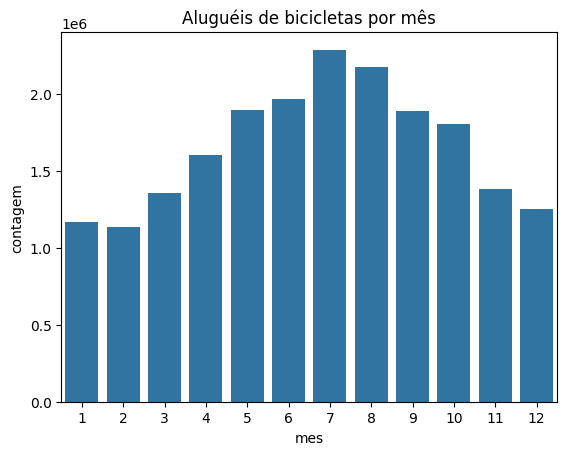

In [244]:
sns.barplot(data=alugueis_mensais, x='mes', y='contagem')
plt.title('Aluguéis de bicicletas por mês')

plt.show()

Vemos a sazonalidade dos dados se mostrando mais fortes, podendo ser pela estação (meio do ano é verão)

### Plots ACF e PACF

Autocorrelation Function (ACF) e Partial Autocorrelation Function (PACF) são para identificar a dependência serial em séries temporais. Elas ajudam a entender a correlação entre pontos da série temporal com lags.

In [245]:
df['contagem']

0         182
1         138
2         134
3          72
4          47
         ... 
17409    1042
17410     541
17411     337
17412     224
17413     139
Name: contagem, Length: 17414, dtype: int64

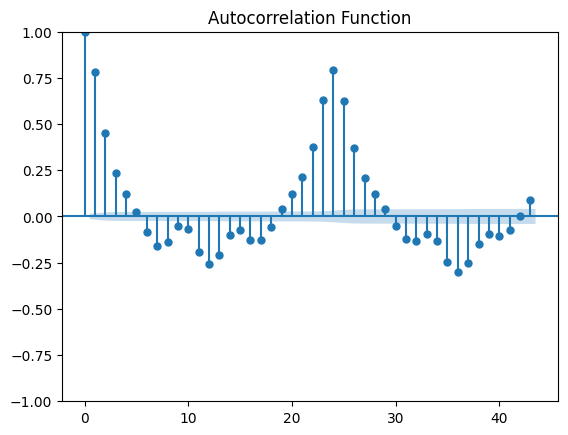

In [246]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plot_acf(df['contagem'])
plt.title('Autocorrelation Function')
plt.show()

A função de autocorrelação mostra um padrão cíclico que pode sugerir uma sazonalidade nos dados. A periodicidade visível pode corresponder a padrões diários, semanais ou mensais, dependendo da frequência dos dados. Como ja apontamos anteriormente.

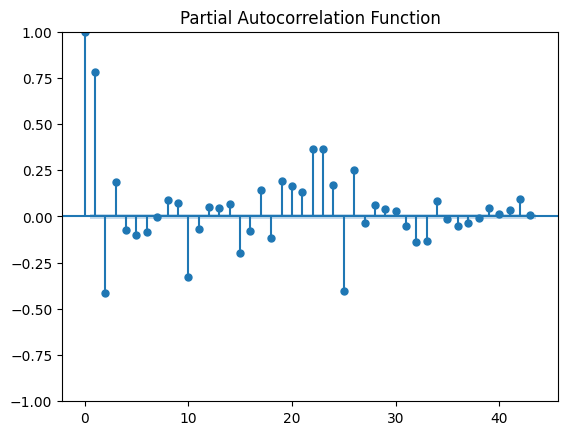

In [247]:
# Plot PACF
plot_pacf(df['contagem'])
plt.title('Partial Autocorrelation Function')
plt.show()

Os valores da PACF diminuem após o lag 1, o que sugere que após a correlação com o lag 1, há menos correlação com lags subsequentes. Isso pode indicar que a maior parte da informação temporal está contida nos primeiros lags.

**Implicações para a Modelagem**

 A presença de padrões cíclicos na ACF sugere que você deve haver componentes sazonais no modelo Prophet.

### Decomposição da série temporal

A decomposição ajuda a entender a tendência, sazonalidade e ruído nos dados.

In [248]:
# Convertendo a coluna 'data_hora' para datetime e definindo como índice
df['data_hora'] = pd.to_datetime(df['data_hora'])
df.set_index('data_hora', inplace=True)

# Resample para frequência diária e somar os valores de 'contagem'
df_dec = df['contagem'].resample('D').sum()

# Verificar a transformação
df_dec.head()

data_hora
2015-01-04     9234
2015-01-05    20372
2015-01-06    20613
2015-01-07    21064
2015-01-08    15601
Freq: D, Name: contagem, dtype: int64

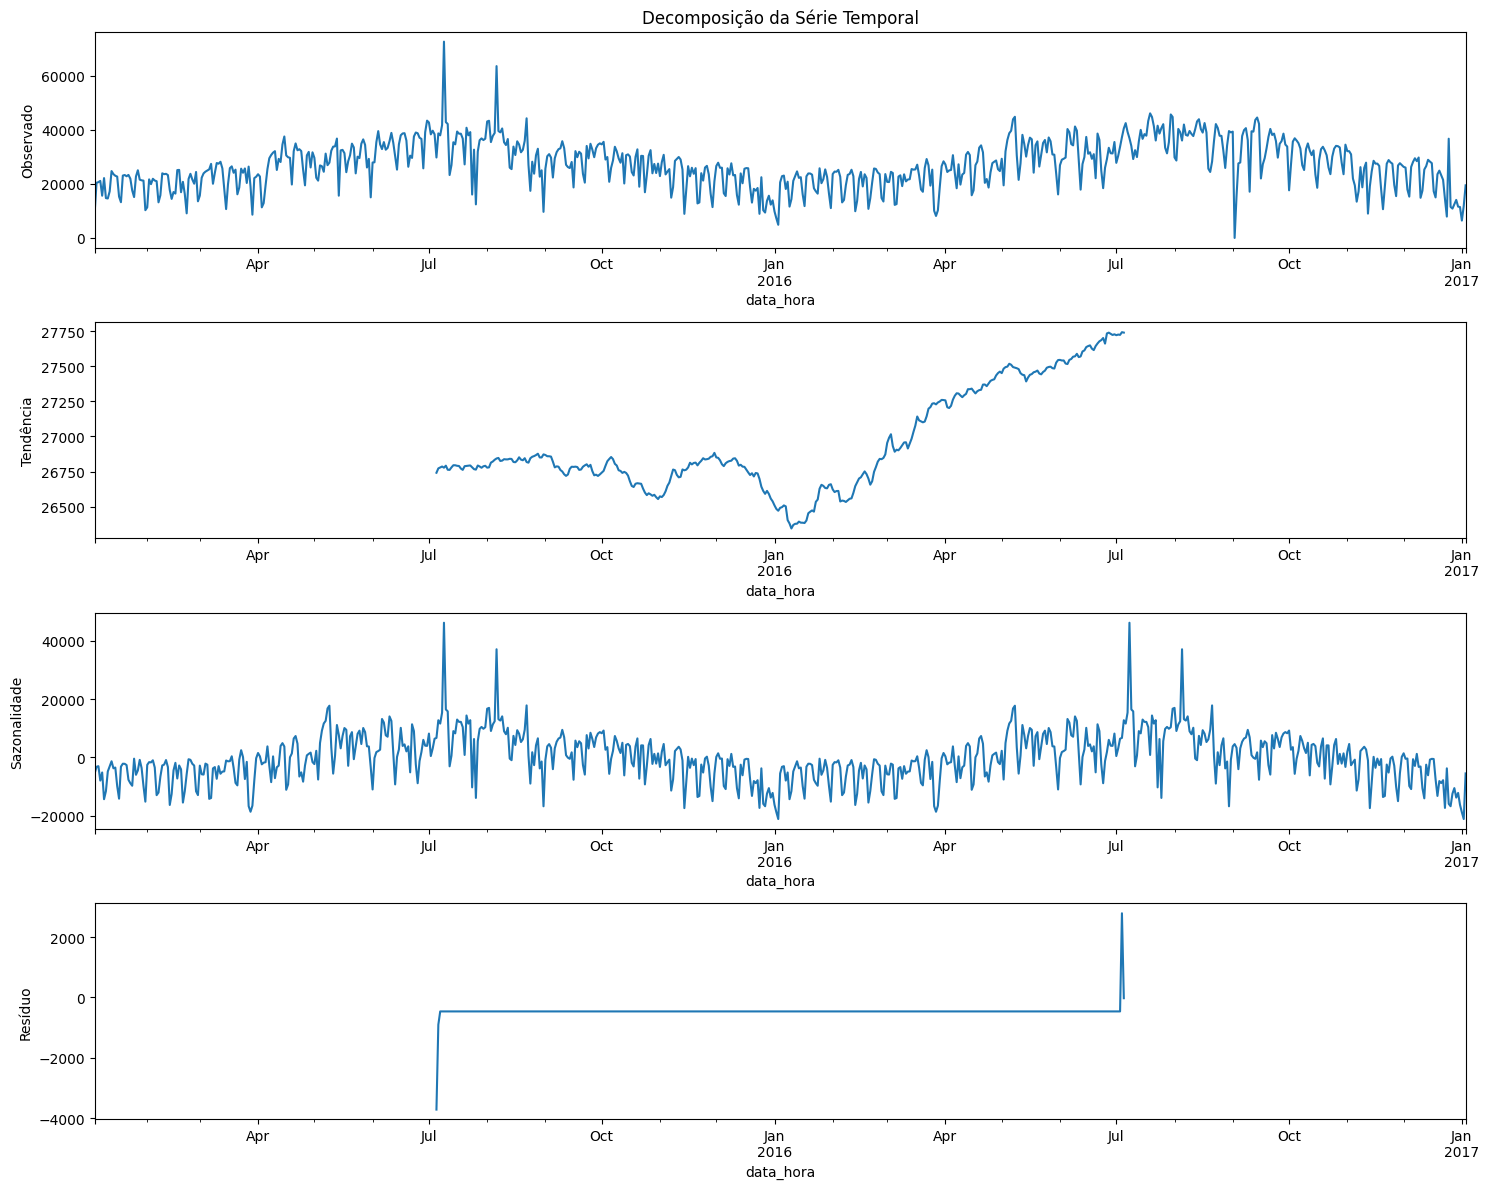

In [249]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decomposição da série temporal diária
result = seasonal_decompose(df_dec, model='additive', period=365)

# Ajustar o tamanho da figura
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))

# Plotando os componentes da decomposição
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observado')
ax1.set_title('Decomposição da Série Temporal')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Tendência')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Sazonalidade')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Resíduo')

plt.tight_layout()
plt.show()

**Observado**

Esta é a série temporal original, mostrando o número total de locações de bicicletas ao longo do tempo.

**Tendência**

Nesse grafico observamos a tendência de longo prazo na série temporal, removendo as variações sazonais e os ruídos. Observamos um aumento gradual no número de locações até aproximadamente julho de 2016, seguido de uma estabilização e depois um aumento novamente. Isso pode refletir um crescimento na popularidade das bicicletas.

**Sazonalidade**

Podemos observar os padrões sazonais repetitivos nos dados. Vemos variações regulares que se repetem aproximadamente a cada ano, indicando uma forte sazonalidade anual. Os picos e vales consistentes sugerem que há épocas do ano em que a locação de bicicletas é mais alta como comentamos anteriormente.

**Resíduo**

Esta componente captura a variação que não pode ser explicada pela tendência ou sazonalidade. Idealmente, esta série deve parecer ruído (sem padrão), indicando que a tendência e a sazonalidade capturam a maior parte da variabilidade na série. Observamos um comportamento estranho onde os resíduos têm um grande salto e depois se estabilizam. Isso pode indicar outliers, erros de dados ou eventos extraordinários que não são capturados pelos outros componentes.

### Teste de estacionaridade

 O Prophet não requer que a série temporal seja estacionária. Isso ocorre porque o Prophet utiliza uma abordagem baseada em aditivos ou multiplicativos que pode modelar diretamente a tendência e a sazonalidade dos dados.


Por que ainda realizar o teste de estacionaridade?

O teste de estacionaridade fornece insights importantes sobre a natureza dos seus dados. Saber se os dados são estacionários ou não pode ajudar a entender melhor as propriedades intrínsecas da série temporal.


In [250]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['contagem'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -9.879285
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


**Hipoteses**

* Hipótese Nula (H0): A série temporal não é estacionária;
* Hipótese Alternativa (H1): A série temporal é estacionária.

Para decidir se rejeitamos a hipótese nula, comparamos a estatística ADF com os valores críticos. Se a estatística ADF for menor (mais negativa) do que os valores críticos e o p-valor for menor do que o nível de significância, rejeitamos a hipótese nula.

**Teste de Dickey-Fuller Aumentado (ADF)**

Quanto mais negativo for o valor da estatística ADF, mais forte é a evidência contra a hipótese nula de que a série temporal não é estacionária. E  é muito menor (mais negativa) do que os valores críticos (Critical Values) para todos os níveis de significância (1%: -3.431, 5%: -2.862, 0%: -2.567).

**p-value**

Um p-valor muito baixo (geralmente abaixo de 0.05) indica que podemos rejeitar a hipótese nula.

# A modelagem para utilização e melhoria do Prophet foram desenvolvidos em um segundo notebook.